### Trước khi tiếp tục phần phân tích ta nạp các thư viện và tải các dữ liệu cần thiết

In [1]:
# write your code here
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
#pd.set_option('display.max_rows', None)
#pd.set_option("display.max_columns", 100)
#pd.set_option("display.expand_frame_repr",False)

- Load data 

In [2]:
df_trip = pd.read_csv('data/trip_ver_3.csv', parse_dates=[2, 3, 14])
df_trip.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log10_trip_duration,direct_distance,average_speed,date,weekday,week,month,day,hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2.658011,1502.171837,11.885316,2016-03-14,0,11,3,14,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2.821514,1808.659969,9.820778,2016-06-12,6,23,6,12,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,3.327155,6379.687175,10.813029,2016-01-19,1,3,1,19,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2.632457,1483.632481,12.450063,2016-04-06,2,14,4,6,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2.638489,1187.037659,9.823760,2016-03-26,5,12,3,26,13


In [3]:
df_weather = pd.read_csv('data/weather_ver_2.csv', parse_dates=[0])
df_weather.head()


,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,2016-01-01,42,34,38.0,0.0,0.0,0.0
1,2016-01-02,40,32,36.0,0.0,0.0,0.0
2,2016-01-03,45,35,40.0,0.0,0.0,0.0
3,2016-01-04,36,14,25.0,0.0,0.0,0.0
4,2016-01-05,29,11,20.0,0.0,0.0,0.0


In [4]:
df_fastest_routes_train = pd.read_csv('data/fastest_routes_train_ver_2.csv')
df_fastest_routes_train.head()


,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


### 3.3 More Analysis with External data
- We have two other tables: weather and faster routes. Use your analysis to find more features that are correlated with trip duration.

#### 3.3.1 How weather affect to total time of a trip? How does snow or rain impact on trip duration?

#### 1. Ta tìm hiểu sự ảnh hưởng của nhiệt độ trung bình đến thời gian chuyến đi

In [5]:
# Kết hợp dữ liệu của bảng trip và weather dựa trên cột 'date'
df_average_temperature = df_weather[['date', 'average temperature']]
df_trip = df_trip.merge(df_average_temperature, on='date', how = 'left', suffixes=(False, False))
df_trip.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,log10_trip_duration,direct_distance,average_speed,date,weekday,week,month,day,hour,average temperature
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2.658011,1502.171837,11.885316,2016-03-14,0,11,3,14,17,45.5
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2.821514,1808.659969,9.820778,2016-06-12,6,23,6,12,0,72.5
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,3.327155,6379.687175,10.813029,2016-01-19,1,3,1,19,11,22.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2.632457,1483.632481,12.450063,2016-04-06,2,14,4,6,19,39.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2.638489,1187.037659,9.823760,2016-03-26,5,12,3,26,13,46.5


In [6]:
# Tạo bảng dữ liệu nhiệt độ và thời gian chuyến đi
df_trip_ave_temp_duration = df_trip[['average temperature', 'trip_duration']]
df_trip_ave_temp_duration.head()


,average temperature,trip_duration
0,45.5,455
1,72.5,663
2,22.0,2124
3,39.0,429
4,46.5,435


In [7]:
# Lọc dữ liệu trip_duration
from filter_outlier import filter_outlier_value_range 
df_trip_ave_temp_duration = filter_outlier_value_range(df_trip_ave_temp_duration, filter_columns = ['trip_duration'])
df_trip_ave_temp_duration.describe()


,average temperature,trip_duration
count,1.383926e+06,1.383926e+06
mean,5.136372e+01,7.312138e+02
std,1.569388e+01,4.474471e+02
min,7.000000e+00,1.000000e+00
25%,3.850000e+01,3.840000e+02
50%,5.150000e+01,6.310000e+02
75%,6.250000e+01,9.910000e+02
max,8.150000e+01,2.087000e+03


In [8]:
# Tạo hàm vẽ đồ thị với đường 'trend' mô tả xu hướng của dữ liệu
import seaborn as sns
import numpy as np

def myline(df, x ='category', y ='trip_duration', deg=1, figsize=(10,6), min=5, max=90, step=5):
    
    df_test = df[[x,y]]
    bin_edges = np.arange(min, max, step=step)
    x_group = pd.cut(df_test[x], bin_edges)
    df_test['x_group']= x_group
    
    group = df_test.groupby('x_group', as_index=False)
    df_group = group.median()
    X = [i for i in range(0, len(df_group))]
    Y = df_group[y]
    trend = np.polyfit(X,Y,deg)
    trend_line = np.poly1d(trend)
    
    plt.figure(figsize=figsize);
    ax = sns.pointplot(x='x_group', y=y, data=df_group, marker='s');
    plt.plot(df_group['x_group'], trend_line(X), color='green');
    plt.title('Line chart of trip duration by {}'.format(x), y=1.04);
    plt.xlabel(x);
    return group, ax


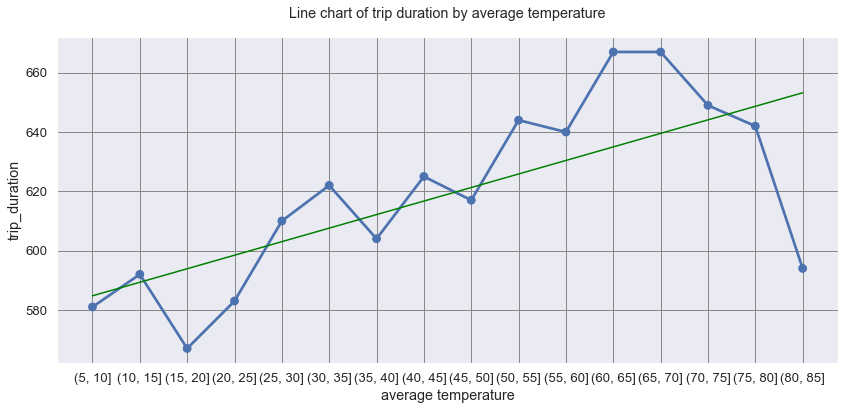

In [9]:
sns.set(font_scale=1.2, style='dark')
myline(df_trip_ave_temp_duration, x ='average temperature', y ='trip_duration', deg=1, figsize=(14,6), min=5, max=90, step=5);
plt.grid(axis='both', color='#8888', linestyle='-');


- <span style="color:blue">Nhận xét:
    - Ta nhận thấy thời gian chuyến đi có xu hướng tăng từ nhiệt độ thấp đến mức nhiệt độ khoảng 60 đến 65 độ F, sau đó giảm dần khi nhiệt độ tăng lên đến hơn 80 độ F. 
    - Phần lớn thời gian là tăng theo nhiệt độ, ta sẽ thấy rõ điều này khi điều chỉnh tăng thông số *step*

#### 2. Tiếp theo ta tìm hiểu sự ảnh hưởng của lượng mưa đến thời gian của chuyến đi

In [10]:
# Thêm cột lượng mưa (precipitation) cho bảng df_trip
df_precipitation = df_weather[['date', 'precipitation']]
df_trip = df_trip.merge(df_precipitation, on='date', how = 'left', suffixes=(False, False))
df_trip.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,direct_distance,average_speed,date,weekday,week,month,day,hour,average temperature,precipitation
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1502.171837,11.885316,2016-03-14,0,11,3,14,17,45.5,0.29
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1808.659969,9.820778,2016-06-12,6,23,6,12,0,72.5,0.00
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,6379.687175,10.813029,2016-01-19,1,3,1,19,11,22.0,0.00
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1483.632481,12.450063,2016-04-06,2,14,4,6,19,39.0,0.00
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1187.037659,9.823760,2016-03-26,5,12,3,26,13,46.5,0.00


In [11]:
# Tạo bảng dữ liệu lượng mưa và thời gian chuyến đi
df_trip_precipitation = df_trip[['precipitation', 'trip_duration']]
df_trip_precipitation.describe()


,precipitation,trip_duration
count,1.351898e+06,1.458644e+06
mean,9.268443e-02,9.594923e+02
std,2.580030e-01,5.237432e+03
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,3.970000e+02
50%,0.000000e+00,6.620000e+02
75%,4.000000e-02,1.075000e+03
max,2.310000e+00,3.526282e+06


- Lọc bỏ các điểm dữ liệu với lượng mưa bị thiếu (NaN)

In [12]:
df_trip_precipitation = df_trip_precipitation.dropna()
df_trip_precipitation.describe()


,precipitation,trip_duration
count,1.351898e+06,1.351898e+06
mean,9.268443e-02,9.601977e+02
std,2.580030e-01,5.375092e+03
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,3.970000e+02
50%,0.000000e+00,6.620000e+02
75%,4.000000e-02,1.075000e+03
max,2.310000e+00,3.526282e+06


In [13]:
# Lọc dữ liệu trip_duration
from filter_outlier import filter_outlier_value_range 
df_trip_precipitation = filter_outlier_value_range(df_trip_precipitation, filter_columns = ['trip_duration'])
df_trip_precipitation.describe()


,precipitation,trip_duration
count,1.282722e+06,1.282722e+06
mean,9.297671e-02,7.308598e+02
std,2.590952e-01,4.469320e+02
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,3.840000e+02
50%,0.000000e+00,6.310000e+02
75%,4.000000e-02,9.900000e+02
max,2.310000e+00,2.084000e+03


- Vẽ biểu đồ lượng mưa và thời gian

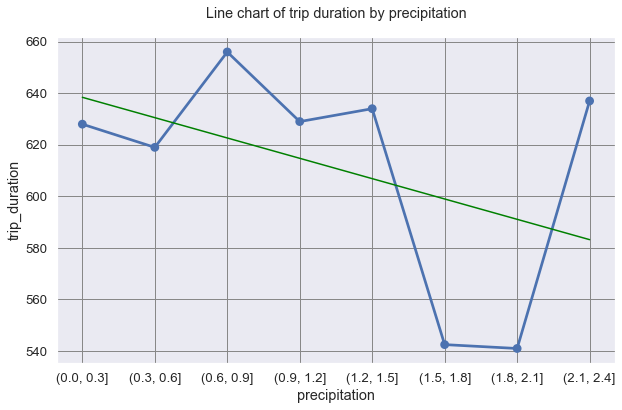

In [14]:
# Vẽ biểu đồ lượng mưa và thời gian chuyến đi
sns.set(font_scale=1.2, style='dark')
group, ax_precipitation = myline(df_trip_precipitation, x ='precipitation', y ='trip_duration', deg=1, figsize=(10,6), min=0, max=2.5, step=0.3);
plt.grid(axis='both', color='#8888', linestyle='-');


- <span style="color:blue">Nhận xét:
    - Thời gian chuyến đi ổn định ở mức lượng mưa <1.5, giảm khi lượng mưa đạt mức 2.1, tăng khi lượng mưa đạt cao nhất mức 2.4. Có vẻ như với một lượng mưa nhất định mật độ giao thông giảm đi thì taxi di chuyển nhanh hơn, tuy nhiên khi mưa rất lớn, taxi sẽ di chuyển chậm hơn vì lý do an toàn.
                                                        

- Ta kiểm tra thống kê F-test để xác định rõ sự khác biệt giữa các nhóm lượng mưa trên
                                                        

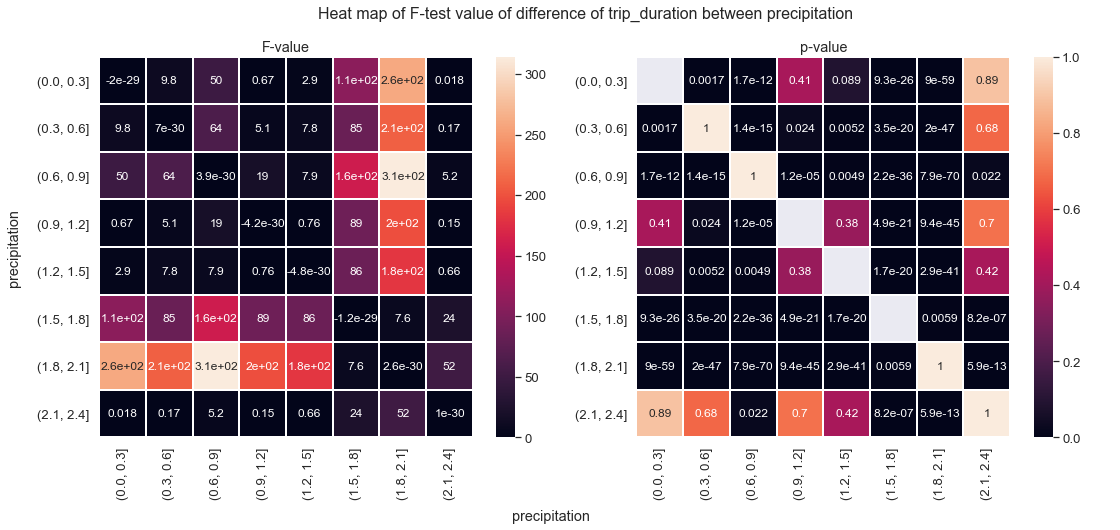

In [15]:
from scipy import stats
import seaborn as sns

sns.set(font_scale=1.2, style='dark')

F_val = np.zeros([8,8])
P_val = np.zeros([8,8])

for i in range(8):
    for j in range(8):
        f_val, p_val = stats.f_oneway(group.get_group(list(group.indices)[i])['trip_duration'],
                                      group.get_group(list(group.indices)[j])['trip_duration'])  
        F_val[i,j] = f_val
        P_val[i,j] = p_val
                
df_F_val = pd.DataFrame(F_val)
df_P_val = pd.DataFrame(P_val)

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig_1 = sns.heatmap(df_F_val, annot=True, annot_kws={'fontsize': 12}, xticklabels=ax_precipitation.get_xticklabels(),
                    yticklabels=ax_precipitation.get_xticklabels(), ax=axes[0], linewidths=1)
fig_1.set_title('F-value');
fig_1.set_yticklabels(fig_1.get_yticklabels(), rotation=0)

fig_2 = sns.heatmap(df_P_val, annot=True, annot_kws={'fontsize': 12}, xticklabels=ax_precipitation.get_xticklabels(),
                    yticklabels=ax_precipitation.get_xticklabels(), ax=axes[1], linewidths=1)
fig_2.set_title('p-value');
fig_2.set_yticklabels(fig_2.get_yticklabels(), rotation=0)

fig.suptitle('Heat map of F-test value of difference of trip_duration between precipitation', fontsize=16);

fig.add_subplot(111, frame_on=False);
plt.tick_params(labelcolor="none", bottom=False, left=False);
plt.xlabel("precipitation", x=0.45, labelpad=50);
plt.ylabel("precipitation", labelpad=50);
plt.subplots_adjust(wspace=0.15);
           

- <span style="color:blue">Nhận xét:
    - Sự khác nhau lớn nhất với đỉnh [1.8,2.1) với tất cả các phần còn lại và đỉnh thứ hai là [0.6,0.9). Nhận xét về diễn biến lượng mưa từ đồ thị bên trên là rất đáng tin cậy.
                                                        

- Ta so sánh thời gian chuyến đi của ngày không mưa so với những ngày mưa?

In [16]:
# Thêm cột biến phân loại rain gồm 2 giá trị Yes và No
df_rain = df_trip[['date', 'precipitation', 'trip_duration']]
df_rain['rain'] = np.where(df_rain['precipitation']==0, 'No', 'Yes')
df_rain = df_rain.dropna()     
df_rain.head()


,date,precipitation,trip_duration,rain
0,2016-03-14,0.29,455,Yes
1,2016-06-12,0.00,663,No
2,2016-01-19,0.00,2124,No
3,2016-04-06,0.00,429,No
4,2016-03-26,0.00,435,No


In [17]:
# Lọc dữ liệu
from filter_outlier import filter_outlier_value_range 
df_rain = filter_outlier_value_range(df_rain, filter_columns = ['trip_duration'])
df_rain.describe()


,precipitation,trip_duration
count,1.282722e+06,1.282722e+06
mean,9.297671e-02,7.308598e+02
std,2.590952e-01,4.469320e+02
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,3.840000e+02
50%,0.000000e+00,6.310000e+02
75%,4.000000e-02,9.900000e+02
max,2.310000e+00,2.084000e+03


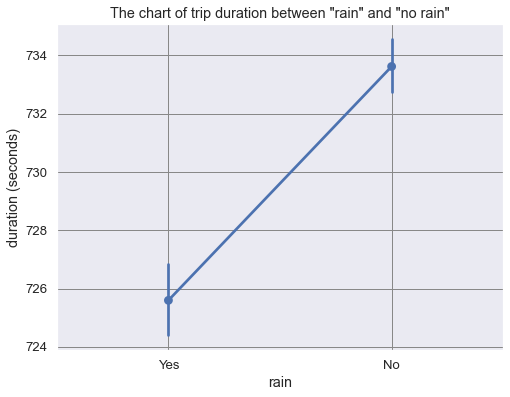

In [18]:
# Vẽ biểu đồ so sánh thời gian chuyến đi giữa ngày mưa và không mưa
plt.figure(figsize=(8,6))
#sns.boxplot(x='rain', y="trip_duration", data=df_rain);
ax = sns.pointplot(x='rain', y="trip_duration", data=df_rain);
plt.title('The chart of trip duration between "rain" and "no rain"')
plt.xlabel('rain')
plt.ylabel('duration (seconds)');
plt.grid(axis='both', color='#8888', linestyle='-')


- <span style="color:blue">Nhận xét:
    - Dựa trên biểu đồ ta thấy những ngày không mưa có thời gian chuyến đi ít hơn so với những ngày mưa. 
                                                        

- Ta kiểm tra thống kê về sự khác biệt thời gian chuyến đi giữa ngày mưa và ngày không mưa

In [19]:
from scipy import stats

df_F_test = df_rain.groupby('rain', as_index=False)
df_F_test_Yes = df_F_test.get_group('Yes')['trip_duration']
df_F_test_No = df_F_test.get_group('No')['trip_duration']
f_val, p_val = stats.f_oneway(df_F_test_Yes, df_F_test_No)  

print( "ANOVA results: F=", f_val, ", P =", p_val) 


ANOVA results: F= 93.29760551134345 , P = 4.50716340410453e-22


- <span style="color:blue">Nhận xét:
    - Kểt quả kiểm tra  F-test khá lớn và P khá bé cho nên ta kết luận có sự khác nhau về thời gian chuyến đi giữa ngày mưa và không mưa.
   

#### 3. Tiếp theo ta tìm hiểu sự ảnh hưởng của lượng tuyết rơi đến thời gian của chuyến đi

In [20]:
# Create dataset
df_snow_fall = df_weather[['date', 'snow fall']]
df_trip = df_trip.merge(df_snow_fall, on='date', how = 'left', suffixes=[False, False])
df_trip.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,average_speed,date,weekday,week,month,day,hour,average temperature,precipitation,snow fall
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,11.885316,2016-03-14,0,11,3,14,17,45.5,0.29,0.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,9.820778,2016-06-12,6,23,6,12,0,72.5,0.00,0.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,10.813029,2016-01-19,1,3,1,19,11,22.0,0.00,0.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,12.450063,2016-04-06,2,14,4,6,19,39.0,0.00,0.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,9.823760,2016-03-26,5,12,3,26,13,46.5,0.00,0.0


In [21]:
# Create dataset
df_trip_snow_fall = df_trip[['snow fall', 'trip_duration']]
df_trip_snow_fall.describe()


,snow fall,trip_duration
count,1.364855e+06,1.458644e+06
mean,6.558374e-02,9.594923e+02
std,9.740456e-01,5.237432e+03
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,3.970000e+02
50%,0.000000e+00,6.620000e+02
75%,0.000000e+00,1.075000e+03
max,2.730000e+01,3.526282e+06


- Lọc bỏ các điểm dữ liệu với lượng tuyết rơi bị thiếu (NaN)

In [22]:
df_trip_snow_fall = df_trip_snow_fall.dropna()
df_trip_snow_fall.describe()


,snow fall,trip_duration
count,1.364855e+06,1.364855e+06
mean,6.558374e-02,9.647628e+02
std,9.740456e-01,5.356585e+03
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,3.980000e+02
50%,0.000000e+00,6.650000e+02
75%,0.000000e+00,1.080000e+03
max,2.730000e+01,3.526282e+06


In [23]:
# Lọc dữ liệu
from filter_outlier import filter_outlier_value_range 
df_trip_snow_fall = filter_outlier_value_range(df_trip_snow_fall, filter_columns = ['trip_duration'])
df_trip_snow_fall.describe()


,snow fall,trip_duration
count,1.294786e+06,1.294786e+06
mean,6.621395e-02,7.344144e+02
std,9.747479e-01,4.497633e+02
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,3.860000e+02
50%,0.000000e+00,6.340000e+02
75%,0.000000e+00,9.950000e+02
max,2.730000e+01,2.098000e+03


- Vẽ biểu đồ lượng tuyết rơi và thời gian chuyến đi

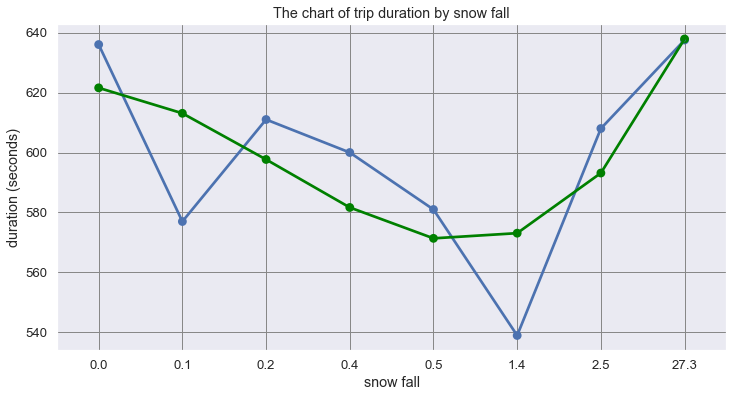

In [24]:
# Vẽ biểu đồ lượng tuyết rơi và thời gian chuyến đi

df_group = df_trip_snow_fall.groupby('snow fall', as_index=False).median()
X = [i for i in range(0, len(df_group))]
Y = df_group['trip_duration']
trend = np.polyfit(X, Y, 3)
trend_line = np.poly1d(trend)

plt.figure(figsize=(12,6))
ax_snow = sns.pointplot(x='snow fall', y="trip_duration", data=df_group);
sns.pointplot(df_group['snow fall'], trend_line(X), color='green');
plt.title('The chart of trip duration by snow fall');
plt.xlabel('snow fall');
plt.ylabel('duration (seconds)');
plt.grid(axis='both', color='#8888', linestyle='-');


- <span style="color:blue">Nhận xét:
    - Thời gian chuyến đi cao nhất khi trời không có tuyết, nhanh nhất với lượng tuyết khoảng 1.4, và có xu hướng tăng khi lượng tuyết rơi rất lớn
   

- Ta kiểm tra thống kê F-test để xác định rõ sự khác biệt giữa các điểm với lượng tuyết rơi khác nhau
                                                        

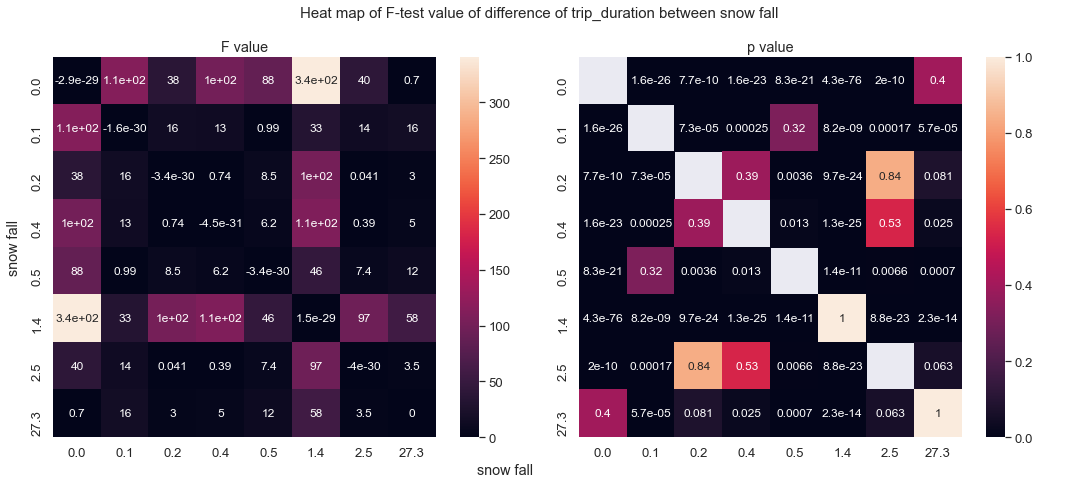

In [25]:
from scipy import stats
import seaborn as sns

sns.set(font_scale=1.2, style='dark')

df_F_test = df_trip_snow_fall.groupby('snow fall',as_index=False)
F_val = np.zeros([8,8])
P_val = np.zeros([8,8])

for i in range(8):
    for j in range(8):
        f_val, p_val = stats.f_oneway(df_F_test.get_group(list(df_F_test.indices)[i])['trip_duration'],
                                      df_F_test.get_group(list(df_F_test.indices)[j])['trip_duration'])  
        F_val[i,j] = f_val
        P_val[i,j] = p_val        

df_F_val = pd.DataFrame(F_val)
df_P_val = pd.DataFrame(P_val)

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig_1 = sns.heatmap(df_F_val, annot=True, annot_kws={'fontsize': 12}, xticklabels=ax_snow.get_xticklabels(),
                    yticklabels=ax_snow.get_xticklabels(), ax=axes[0])
fig_1.set_title('F value');
fig_2 = sns.heatmap(df_P_val, annot=True, annot_kws={'fontsize': 12}, xticklabels=ax_snow.get_xticklabels(),
                    yticklabels=ax_snow.get_xticklabels(), ax=axes[1])
fig_2.set_title('p value');
fig.suptitle('Heat map of F-test value of difference of trip_duration between snow fall', fontsize=15);

fig.add_subplot(111, frame_on=False);
plt.tick_params(labelcolor="none", bottom=False, left=False);
plt.xlabel('snow fall', x=0.45);
plt.ylabel('snow fall');
plt.subplots_adjust(wspace=0.1);


- <span style="color:blue">Nhận xét:
    - Kểt quả kiểm tra  F-test cho thấy sự khác biệt nhất ở lượng tuyết rơi ở mức 1.4 so với các trường hợp còn lại
   

#### Ta so sánh thời gian chuyến đi của ngày có tuyết rơi so với những ngày không có tuyết rơi ?

In [26]:
# Thêm cột biến phân loại rain gồm 2 giá trị Yes và No
df_snow_fall = df_trip[['date', 'snow fall', 'trip_duration']]
df_snow_fall['snow'] = np.where(df_snow_fall['snow fall']==0, 'No', 'Yes')
df_snow_fall = df_snow_fall.dropna()     
df_snow_fall.head()


,date,snow fall,trip_duration,snow
0,2016-03-14,0.0,455,No
1,2016-06-12,0.0,663,No
2,2016-01-19,0.0,2124,No
3,2016-04-06,0.0,429,No
4,2016-03-26,0.0,435,No


In [27]:
# Lọc dữ liệu
from filter_outlier import filter_outlier_value_range 
df_snow_fall = filter_outlier_value_range(df_snow_fall, filter_columns = ['trip_duration'])
df_snow_fall.describe()


,snow fall,trip_duration
count,1.294786e+06,1.294786e+06
mean,6.621395e-02,7.344144e+02
std,9.747479e-01,4.497633e+02
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,3.860000e+02
50%,0.000000e+00,6.340000e+02
75%,0.000000e+00,9.950000e+02
max,2.730000e+01,2.098000e+03


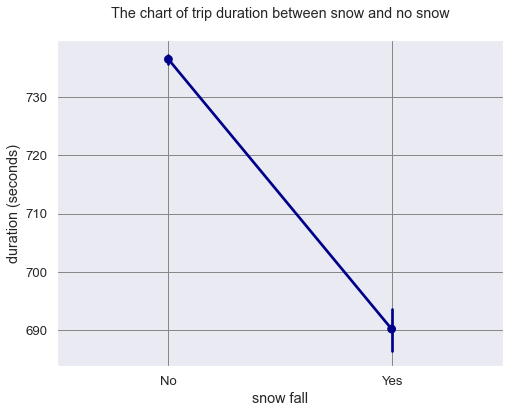

In [28]:
# Vẽ biểu đồ so sánh thời gian chuyến đi giữa ngày có tuyết và không có tuyết
plt.figure(figsize=(8,6))
ax = sns.pointplot(x='snow', y="trip_duration", data=df_snow_fall, color='darkblue');
plt.title('The chart of trip duration between snow and no snow', y=1.05)
plt.xlabel('snow fall')
plt.ylabel('duration (seconds)');
plt.grid(axis='both', color='#8888', linestyle='-');


- <span style="color:blue">Nhận xét:
    - Thời gian chuyến đi của ngày có tuyết là nhanh hơn so với những ngày không có tuyết. 
                                                        

- Ta kiểm tra thống kê về sự khác biệt thời gian chuyến đi giữa ngày có tuyết và ngày không có tuyết

In [29]:
from scipy import stats

df_F_test = df_snow_fall.groupby('snow', as_index=False)
df_F_test_Yes = df_F_test.get_group('Yes')['trip_duration']
df_F_test_No = df_F_test.get_group('No')['trip_duration']

f_val, p_val = stats.f_oneway(df_F_test_Yes, df_F_test_No)  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   


ANOVA results: F= 561.5447700075184 , P = 4.122008951601731e-124


- <span style="color:blue">Nhận xét:
    - Kểt quả kiểm tra  F-test rất lớn và P rất bé cho nên ta kết luận có sự khác nhau về thời gian chuyến đi giữa ngày có tuyết rơi và không có tuyết rơi.
   

#### 4. Cuối cùng ta tìm hiểu sự ảnh hưởng của độ dày tuyết đến thời gian của chuyến đi

In [30]:
# Thêm cột 'snow depth' vào bảng df_trip
df_snow_depth = df_weather[['date', 'snow depth']]
df_trip = df_trip.merge(df_snow_depth, on='date', how = 'left', suffixes=[False, False])
df_trip.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,date,weekday,week,month,day,hour,average temperature,precipitation,snow fall,snow depth
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,2016-03-14,0,11,3,14,17,45.5,0.29,0.0,0.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,2016-06-12,6,23,6,12,0,72.5,0.00,0.0,0.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,2016-01-19,1,3,1,19,11,22.0,0.00,0.0,NaN
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,2016-04-06,2,14,4,6,19,39.0,0.00,0.0,0.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,2016-03-26,5,12,3,26,13,46.5,0.00,0.0,0.0


In [31]:
# Tạo bảng dữ liệu 
df_trip_snow_depth = df_trip[['snow depth', 'trip_duration']]
df_trip_snow_depth.describe()


,snow depth,trip_duration
count,1.403773e+06,1.458644e+06
mean,4.239695e-01,9.594923e+02
std,2.288859e+00,5.237432e+03
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,3.970000e+02
50%,0.000000e+00,6.620000e+02
75%,0.000000e+00,1.075000e+03
max,2.200000e+01,3.526282e+06


- Lọc bỏ các điểm dữ liệu với *snow depth* bị thiếu (NaN)

In [32]:
df_trip_snow_depth = df_trip_snow_depth.dropna()
df_trip_snow_depth.describe()


,snow depth,trip_duration
count,1.403773e+06,1.403773e+06
mean,4.239695e-01,9.627224e+02
std,2.288859e+00,5.311139e+03
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,3.980000e+02
50%,0.000000e+00,6.640000e+02
75%,0.000000e+00,1.078000e+03
max,2.200000e+01,3.526282e+06


In [33]:
# Lọc dữ liệu
from filter_outlier import filter_outlier_value_range
df_trip_snow_depth = filter_outlier_value_range(df_trip_snow_depth, filter_columns = ['trip_duration'])
df_trip_snow_depth.describe()


,snow depth,trip_duration
count,1.331861e+06,1.331861e+06
mean,4.179745e-01,7.327618e+02
std,2.264895e+00,4.486311e+02
min,0.000000e+00,1.000000e+00
25%,0.000000e+00,3.850000e+02
50%,0.000000e+00,6.330000e+02
75%,0.000000e+00,9.930000e+02
max,2.200000e+01,2.092000e+03


- Vẽ biểu đồ độ dày tuyết và thời gian chuyến đi

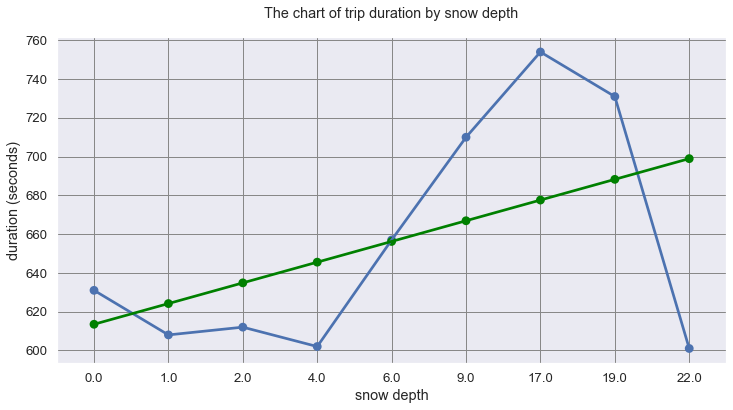

In [34]:
# Vẽ biểu đồ lượng tuyết rơi và thời gian chuyến đi
df_group = df_trip_snow_depth.groupby('snow depth', as_index=False).median()
X = [i for i in range(0, len(df_group))]
Y = df_group['trip_duration']
trend = np.polyfit(X, Y, 1)
trend_line = np.poly1d(trend)

plt.figure(figsize=(12,6))
ax_snow_depth = sns.pointplot(x='snow depth', y="trip_duration", data=df_group);
sns.pointplot(x=df_group['snow depth'], y=trend_line(X), color='green')
plt.title('The chart of trip duration by snow depth', y=1.04)
plt.xlabel('snow depth')
plt.ylabel('duration (seconds)');
plt.grid(axis='both', color='#8888', linestyle='-');


- <span style="color:blue">Nhận xét:
    - Thời gian chuyến đi ổn định ở mức < 4.0 tăng dần đạt cao nhất khi độ dày tuyết đạt 17, giảm khi độ dày tuyết đạt cao nhất 22.0. Về cơ bản thì độ dày tuyết càng tăng thì sẽ càng cản trở dự di chuyển, tuy nhiên với trường hợp độ dày tuyết rất lớn thì sự di chuyển lại nhanh hơn. Điều này có thể được lý giải rằng việc di chuyển trở nên ít hơn khi thời tiết bất lợi
                                             

- Ta kiểm tra thống kê F-test để xác định rõ sự khác biệt giữa các điểm với độ dày tuyết khác nhau
                                                        

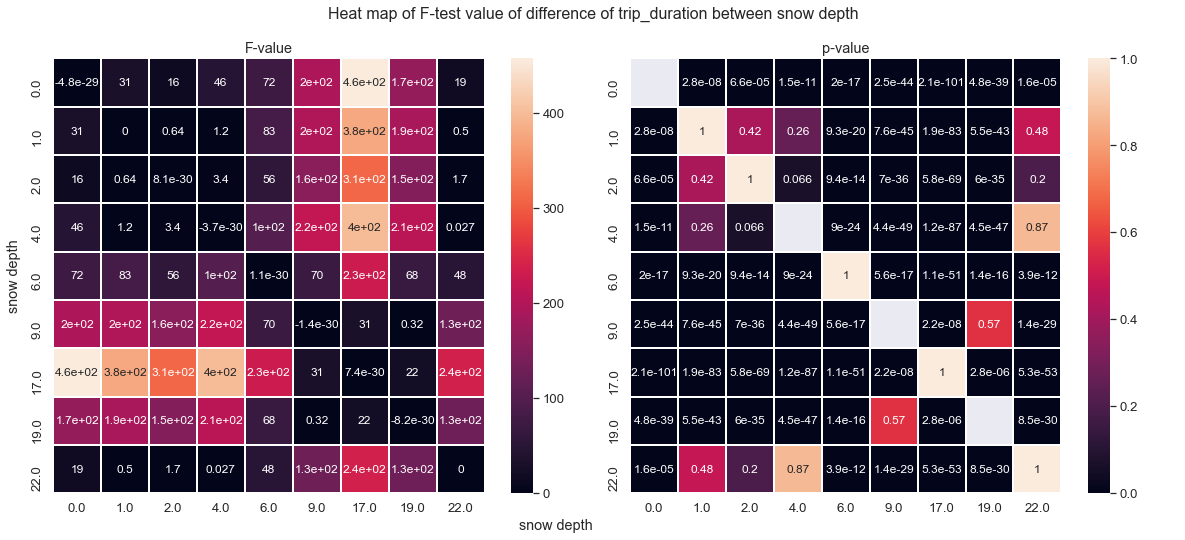

In [35]:
from scipy import stats
import seaborn as sns

sns.set(font_scale=1.2, style='dark')

df_F_test = df_trip_snow_depth.groupby('snow depth',as_index=False)
F_val = np.zeros([9,9])
P_val = np.zeros([9,9])

for i in range(9):
    for j in range(9):
        f_val, p_val = stats.f_oneway(df_F_test.get_group(list(df_F_test.indices)[i])['trip_duration'],
                                      df_F_test.get_group(list(df_F_test.indices)[j])['trip_duration'])  
        F_val[i,j] = f_val
        P_val[i,j] = p_val        

df_F_val = pd.DataFrame(F_val)
df_P_val = pd.DataFrame(P_val)

fig, axes = plt.subplots(1, 2, figsize=(20,8))
fig_1 = sns.heatmap(df_F_val, annot=True, annot_kws={"size": 12}, xticklabels=ax_snow_depth.get_xticklabels(),
                    yticklabels=ax_snow_depth.get_xticklabels(),
                    ax=axes[0], linewidths=1)
fig_1.set_title('F-value');
fig_2 = sns.heatmap(df_P_val, annot=True, annot_kws={"size": 12}, xticklabels=ax_snow_depth.get_xticklabels(),
                    yticklabels=ax_snow_depth.get_xticklabels(),
                    ax=axes[1], linewidths=1)
fig_2.set_title('p-value');
fig.suptitle('Heat map of F-test value of difference of trip_duration between snow depth', y=0.97, fontsize=16);

fig.add_subplot(111, frame_on=False);
plt.tick_params(labelcolor="none", bottom=False, left=False);
plt.xlabel('snow depth', x=0.45);
plt.ylabel('snow depth');
plt.subplots_adjust(wspace=0.07);


- <span style="color:blue">Nhận xét:
    - Kểt quả kiểm tra  F-test cho thấy sự khác biệt nhất ở độ dày tuyết ở nhóm 9.0 đến 19.0 so với các trường hợp còn lại
   

- Another external data set is fastest route of each trip that includes the pickup/dropoff streets and total distance/duration between these two points together with a sequence of travels steps such as turns or entering a highway. 
- This is suggested information about the fastest route from starting street to ending street for a trip that will help you estimate the duration.

#### 3.3.2 How is number of left turns, right turns, turns effect to trip duration? 

In [36]:
# Create dataset
df_turn = df_fastest_routes_train[['id', 'step_direction']]
df_turn.head()


,id,step_direction
0,id2875421,left|straight|right|straight|arrive
1,id2377394,none|right|left|right|left|arrive
2,id3504673,left|left|right|arrive
3,id2181028,right|left|right|left|arrive
4,id0801584,right|right|right|left|arrive


In [37]:
# Thêm các cột là số lần rẽ, rẽ trái, và rẽ phải được tính từ cột 'step_direction'
number_turn_left = []
number_turn_right = []
total_number_turn = []
for row in df_turn.step_direction:
    count_turn_left = 0
    count_turn_right = 0
    list_turn = row.split('|')
    for string in list_turn[1:]:
        if string =='left':
            count_turn_left+=1
        if string =='right':
            count_turn_right+=1
    number_turn_left.append(count_turn_left)
    number_turn_right.append(count_turn_right)
    total_number_turn.append(count_turn_left+count_turn_right)
    
df_turn['number_turn_left'] = number_turn_left
df_turn['number_turn_right'] = number_turn_right
df_turn['total_number_turn'] = total_number_turn
df_turn.head()


,id,step_direction,number_turn_left,number_turn_right,total_number_turn
0,id2875421,left|straight|right|straight|arrive,0,1,1
1,id2377394,none|right|left|right|left|arrive,2,2,4
2,id3504673,left|left|right|arrive,1,1,2
3,id2181028,right|left|right|left|arrive,2,1,3
4,id0801584,right|right|right|left|arrive,1,2,3


In [38]:
# Thêm các cột 'number_turn_left, number_turn_right, total_number_turn' vào bảng df_trip
df_trip = df_trip.merge(df_turn[['id', 'number_turn_left', 'number_turn_right', 'total_number_turn']],
                                 on='id', how='right', suffixes=[False, False])

df_trip.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,month,day,hour,average temperature,precipitation,snow fall,snow depth,number_turn_left,number_turn_right,total_number_turn
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,14,17,45.5,0.29,0.0,0.0,0,1,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,12,0,72.5,0.00,0.0,0.0,2,2,4
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,19,11,22.0,0.00,0.0,NaN,4,4,8
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,6,19,39.0,0.00,0.0,0.0,1,1,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,26,13,46.5,0.00,0.0,0.0,2,1,3


In [39]:
# Tạo bảng dữ liệu 
df_trip_turn = df_trip[['number_turn_left', 'number_turn_right', 'total_number_turn', 'trip_duration']]
df_trip_turn.describe()


,number_turn_left,number_turn_right,total_number_turn,trip_duration
count,1.458643e+06,1.458643e+06,1.458643e+06,1.458643e+06
mean,1.614062e+00,1.743526e+00,3.357588e+00,9.594929e+02
std,1.242934e+00,1.313652e+00,2.016662e+00,5.237433e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,2.000000e+00,3.970000e+02
50%,1.000000e+00,2.000000e+00,3.000000e+00,6.620000e+02
75%,2.000000e+00,3.000000e+00,5.000000e+00,1.075000e+03
max,1.100000e+01,1.200000e+01,2.000000e+01,3.526282e+06


In [40]:
# Lọc dữ liệu trip_duration
import importlib, sys
from filter_outlier import filter_outlier_value_range
df_trip_turn_filter = filter_outlier_value_range(df_trip_turn, filter_columns = ['trip_duration'])
df_trip_turn_filter.describe()


,number_turn_left,number_turn_right,total_number_turn,trip_duration
count,1.383925e+06,1.383925e+06,1.383925e+06,1.383925e+06
mean,1.590440e+00,1.710005e+00,3.300445e+00,7.312143e+02
std,1.228870e+00,1.297169e+00,1.983358e+00,4.474469e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,2.000000e+00,3.840000e+02
50%,1.000000e+00,2.000000e+00,3.000000e+00,6.310000e+02
75%,2.000000e+00,2.000000e+00,4.000000e+00,9.910000e+02
max,1.000000e+01,1.200000e+01,2.000000e+01,2.087000e+03


In [41]:
# Lọc dữ liệu number_turn_left
from filter_outlier import filter_outlier_category
df_trip_turn_filter_left = filter_outlier_category(df_trip_turn_filter, category_column='number_turn_left', threshold_category =0.75)
df_trip_turn_filter_left.describe()


,number_turn_left,number_turn_right,total_number_turn,trip_duration
count,1.382373e+06,1.382373e+06,1.382373e+06,1.382373e+06
mean,1.584143e+00,1.708005e+00,3.292148e+00,7.305384e+02
std,1.214990e+00,1.295263e+00,1.968013e+00,4.470532e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,2.000000e+00,3.840000e+02
50%,1.000000e+00,2.000000e+00,3.000000e+00,6.310000e+02
75%,2.000000e+00,2.000000e+00,4.000000e+00,9.890000e+02
max,6.000000e+00,1.200000e+01,1.700000e+01,2.087000e+03


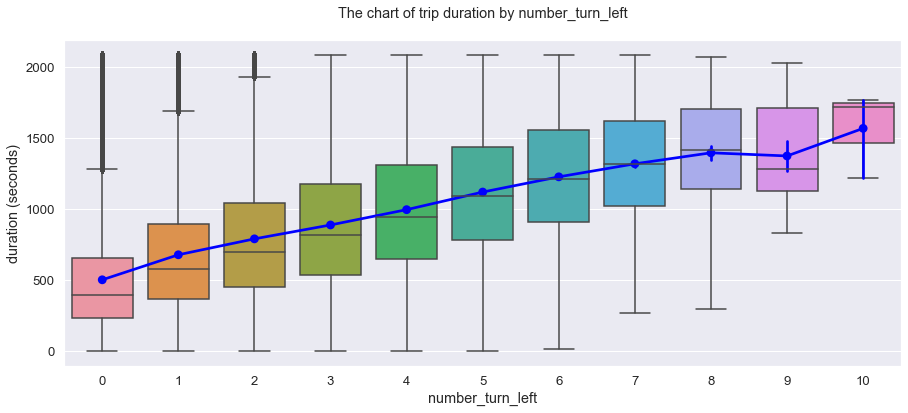

In [42]:
# Vẽ biểu đồ số lần rẽ trái và thời gian chuyến đi
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(15,6))
sns.boxplot(x='number_turn_left', y="trip_duration", data=df_trip_turn_filter);
ax = sns.pointplot(x='number_turn_left', y="trip_duration", data=df_trip_turn_filter, color='blue');
plt.title('The chart of trip duration by number_turn_left', y=1.05)
plt.xlabel('number_turn_left')
plt.ylabel('duration (seconds)');


In [43]:
# Lọc dữ liệu number_turn_right
from filter_outlier import filter_outlier_category
df_trip_turn_filter_right = filter_outlier_category(df_trip_turn_filter, category_column='number_turn_right', threshold_category =0.70)
df_trip_turn_filter_right.describe()


,number_turn_left,number_turn_right,total_number_turn,trip_duration
count,1.381333e+06,1.381333e+06,1.381333e+06,1.381333e+06
mean,1.587201e+00,1.699604e+00,3.286805e+00,7.302206e+02
std,1.225814e+00,1.275727e+00,1.958554e+00,4.469091e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,2.000000e+00,3.840000e+02
50%,1.000000e+00,2.000000e+00,3.000000e+00,6.310000e+02
75%,2.000000e+00,2.000000e+00,4.000000e+00,9.890000e+02
max,1.000000e+01,6.000000e+00,1.500000e+01,2.087000e+03


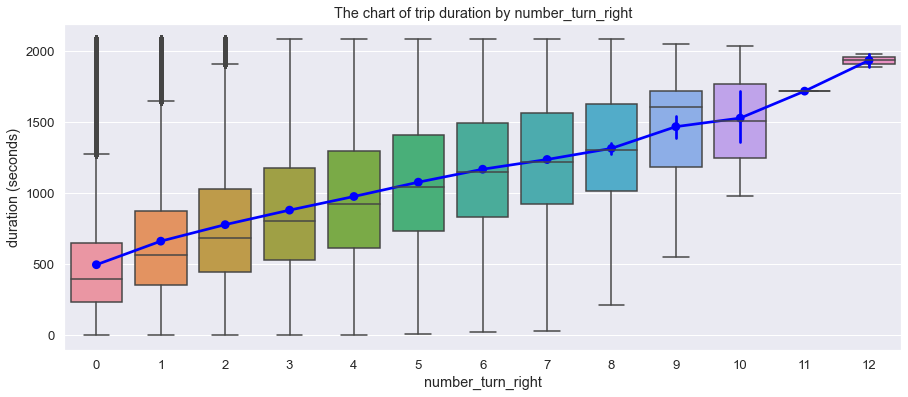

In [44]:
# Vẽ biểu đồ số lần rẽ phải và thời gian chuyến đi
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(15,6))
sns.boxplot(x='number_turn_right', y="trip_duration", data=df_trip_turn_filter);
ax = sns.pointplot(x='number_turn_right', y="trip_duration", data=df_trip_turn_filter, color='blue');
plt.title('The chart of trip duration by number_turn_right')
plt.xlabel('number_turn_right')
plt.ylabel('duration (seconds)');


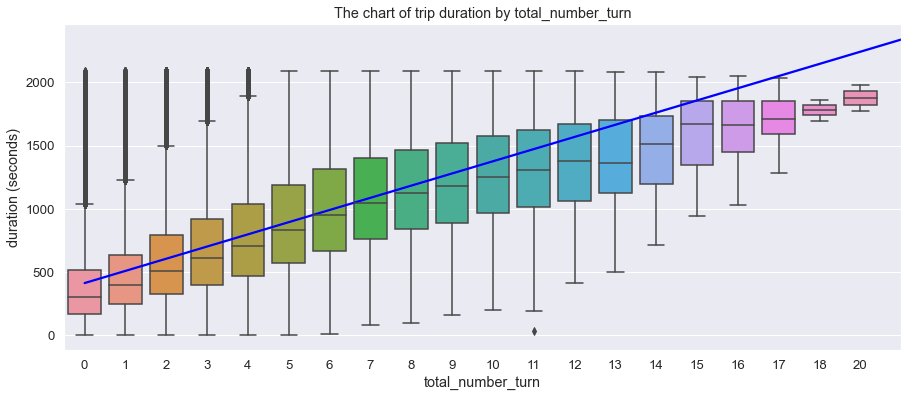

In [45]:
# Vẽ biểu đồ tổng số lần rẽ và thời gian chuyến đi
import seaborn as sns
sns.set(font_scale=1.2, style='darkgrid')
plt.figure(figsize=(15,6))
sns.boxplot(x='total_number_turn', y="trip_duration", data=df_trip_turn_filter);
#ax = sns.pointplot(x='total_number_turn', y="trip_duration", data=df_trip_turn);
sns.regplot(x='total_number_turn', y="trip_duration", data=df_trip_turn_filter, scatter=False, color="blue")
plt.title('The chart of trip duration by total_number_turn')
plt.xlabel('total_number_turn')
plt.ylabel('duration (seconds)');


- <span style="color:blue">Nhận xét:
    - Thời gian chuyến đi tăng khi số lần rẽ tăng

#### 3.3.3 Phân tích mối quan hệ của tổng khoảng cách, số bước, và tổng thời gian với thời gian chuyến đi

In [46]:
# Thêm các cột 'total_distance, total_travel_time, number_of_steps' vào bảng df_trip
df_trip = df_trip.merge(df_fastest_routes_train[['id', 'total_distance', 'total_travel_time', 'number_of_steps']],
                        on='id', how='right', suffixes=[False, False])

df_trip.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,average temperature,precipitation,snow fall,snow depth,number_turn_left,number_turn_right,total_number_turn,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,45.5,0.29,0.0,0.0,0,1,1,2009.1,164.9,5
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,72.5,0.00,0.0,0.0,2,2,4,2513.2,332.0,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,22.0,0.00,0.0,NaN,4,4,8,11060.8,767.6,16
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,39.0,0.00,0.0,0.0,1,1,2,1779.4,235.8,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,46.5,0.00,0.0,0.0,2,1,3,1614.9,140.1,5


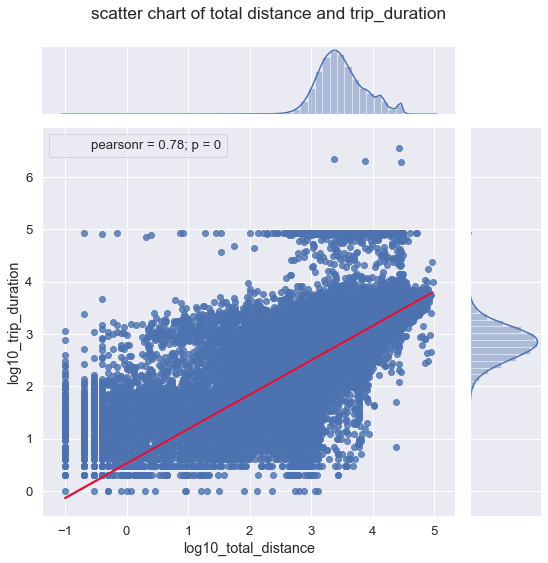

In [47]:
# Vẽ đồ thị biểu biễn mối quan hệ giữa tổng khoảng cách và thời gian chuyến đi
import seaborn as sns
from scipy.stats import stats

sns.set(font_scale=1.2, style='darkgrid')

df_data = df_trip[['total_distance', 'log10_trip_duration']]
df_data = df_data.query('total_distance!=0.0')
df_data['log10_total_distance'] = np.log10(df_trip['total_distance'])

plot = sns.jointplot(x="log10_total_distance", y="log10_trip_duration", data=df_data,
                     height=8, ratio=5, 
                     kind='reg', joint_kws={'line_kws':{'color':'crimson'}},
                     stat_func=stats.pearsonr,
                     );
plot.fig.suptitle('scatter chart of total distance and trip_duration');
plot.fig.subplots_adjust(top=0.91);


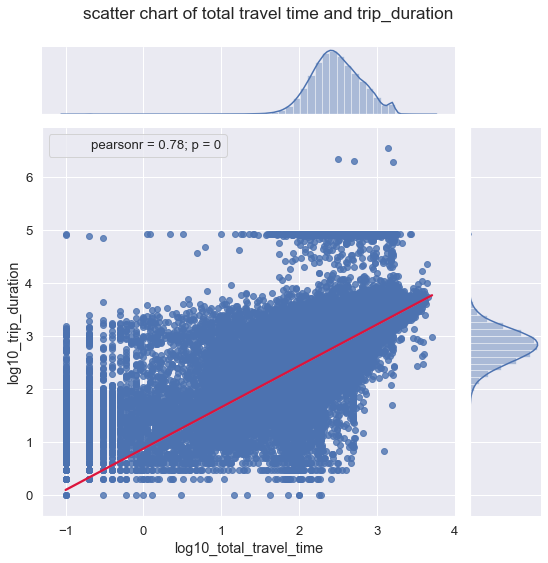

In [48]:
# Vẽ đồ thị biểu biễn mối quan hệ giữa tổng thời gian và thời gian chuyến đi
import seaborn as sns
from scipy.stats import stats

sns.set(font_scale=1.2, style='darkgrid')

df_data = df_trip[['total_travel_time', 'log10_trip_duration']]
df_data = df_data.query('total_travel_time!=0.0')
df_data['log10_total_travel_time'] = np.log10(df_trip['total_travel_time'])

plot = sns.jointplot(x="log10_total_travel_time", y="log10_trip_duration", data=df_data,
                     height=8, ratio=5, 
                     kind='reg', joint_kws={'line_kws':{'color':'crimson'}},
                     stat_func=stats.pearsonr,
                     );
plot.fig.suptitle('scatter chart of total travel time and trip_duration');
plot.fig.subplots_adjust(top=0.91);


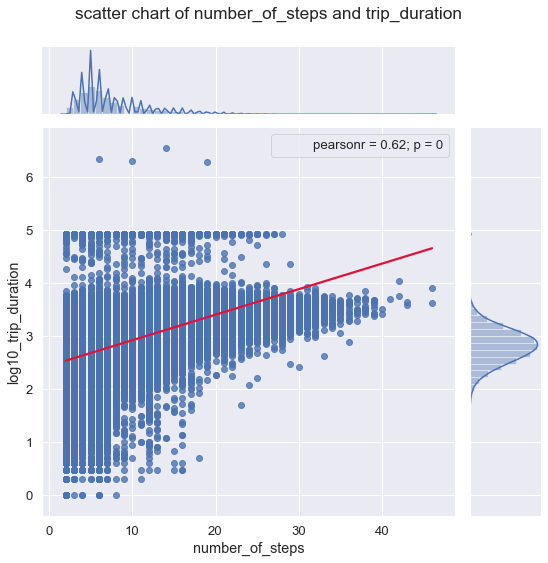

In [49]:
# Vẽ đồ thị biểu biễn mối quan hệ giữa số bước và thời gian chuyến đi
import seaborn as sns
from scipy.stats import stats

sns.set(font_scale=1.2, style='darkgrid')

df_data = df_trip[['number_of_steps', 'log10_trip_duration']]

plot = sns.jointplot(x="number_of_steps", y="log10_trip_duration", data=df_data,
                     height=8, ratio=5, 
                     kind='reg', joint_kws={'line_kws':{'color':'crimson'}},
                     stat_func=stats.pearsonr,
                     );
plot.fig.suptitle('scatter chart of number_of_steps and trip_duration');
plot.fig.subplots_adjust(top=0.91);


- <span style="color:blue">Nhận xét:
    - Thời gian chuyến đi tăng khi số bước và tổng khoảng cách tăng
    - Mối tương quan giữa thời gian chuyến đi và tổng thời gian di chuyển chỉ là tương đối cao nguyên nhân do yếu tố thực tế tác động làm thời gian chuyến đi tăng lên ví dụ như thời gian tắc đường vv.
    

### <span style="color:blue">4.Feature Selection </span>

- Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in
<br><br/>
- Read here
https://www.kaggle.com/sz8416/6-ways-for-feature-selection
<br><br/>
- After engineering new features and before starting the modelling, we will visualize the relations between our parameters using a correlation matrix. For this, we need to change all the input features into a numerical format. The visualisation uses the heatmap plot from seaborn package

### 4.1 Correlation
- Read more about feature selection with correlation: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

#### 4.1.1 Chuẩn bị dữ liệu:
- Lọc dữ liệu các chuyến đi
- Loại bỏ các cột với thông tin không cần thiết   
- Biến đổi dữ liệu category thành numeric

#### 1. Lọc dữ liệu

In [50]:
# Loại bỏ các chuyến đi có total_travel_time và total_distance quá bé
df_train = df_trip.query('total_travel_time>30 & total_distance>100')
df_train.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log10_trip_duration,direct_distance,average_speed,...,average temperature,precipitation,snow fall,snow depth,number_turn_left,number_turn_right,total_number_turn,total_distance,total_travel_time,number_of_steps
count,1.445182e+06,1.445182e+06,1.445182e+06,1.445182e+06,1.445182e+06,1.445182e+06,1.445182e+06,1.445182e+06,1.445182e+06,1.445182e+06,...,1.445182e+06,1.339462e+06,1.352290e+06,1.390800e+06,1.445182e+06,1.445182e+06,1.445182e+06,1.445182e+06,1.445182e+06,1.445182e+06
mean,1.535009e+00,1.665327e+00,-7.397359e+01,4.075098e+01,-7.397352e+01,4.075186e+01,9.640082e+02,2.815184e+00,3.473531e+03,1.452070e+01,...,5.150296e+01,9.268388e-02,6.544905e-02,4.234951e-01,1.628609e+00,1.759016e+00,3.387625e+00,4.668971e+03,3.929444e+02,7.597416e+00
std,4.987731e-01,1.314637e+00,3.812158e-02,3.019098e-02,3.776545e-02,3.352372e-02,5.251656e+03,3.308234e-01,4.303438e+03,1.494813e+01,...,1.568402e+01,2.579735e-01,9.726454e-01,2.286792e+00,1.239289e+00,1.309559e+00,2.001437e+00,5.310041e+03,3.137314e+02,4.422057e+00
min,1.000000e+00,0.000000e+00,-7.854740e+01,3.471223e+01,-7.981798e+01,3.218114e+01,1.000000e+00,0.000000e+00,4.236108e-01,4.721437e-05,...,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.162000e+02,3.010000e+01,2.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073741e+01,-7.399133e+01,4.073594e+01,4.010000e+02,2.603144e+00,1.252381e+03,9.210498e+00,...,3.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.691900e+03,1.841000e+02,5.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398177e+01,4.075413e+01,-7.397978e+01,4.075455e+01,6.660000e+02,2.823474e+00,2.114379e+03,1.285279e+01,...,5.150000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.780600e+03,2.920000e+02,6.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396747e+01,4.076836e+01,-7.396313e+01,4.076982e+01,1.079000e+03,3.033021e+00,3.903771e+03,1.789645e+01,...,6.300000e+01,4.000000e-02,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,5.153500e+03,4.936000e+02,9.000000e+00
max,2.000000e+00,8.000000e+00,-7.179990e+01,5.188108e+01,-7.034608e+01,4.392103e+01,3.526282e+06,6.547317e+00,1.240510e+06,9.279582e+03,...,8.150000e+01,2.310000e+00,2.730000e+01,2.200000e+01,1.100000e+01,1.200000e+01,2.000000e+01,9.420420e+04,5.135400e+03,4.600000e+01


In [51]:
# Loại bỏ các chuyến đi có khoảng cách trực tiếp lớn hơn tổng khoảng cách - những trường hợp định vị sai vị trí
df_train_F2 = df_train.query('direct_distance<=total_distance')
df_train_F2.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log10_trip_duration,direct_distance,average_speed,...,average temperature,precipitation,snow fall,snow depth,number_turn_left,number_turn_right,total_number_turn,total_distance,total_travel_time,number_of_steps
count,1.436769e+06,1.436769e+06,1.436769e+06,1.436769e+06,1.436769e+06,1.436769e+06,1.436769e+06,1.436769e+06,1.436769e+06,1.436769e+06,...,1.436769e+06,1.331690e+06,1.344454e+06,1.382746e+06,1.436769e+06,1.436769e+06,1.436769e+06,1.436769e+06,1.436769e+06,1.436769e+06
mean,1.535014e+00,1.665531e+00,-7.397355e+01,4.075098e+01,-7.397346e+01,4.075188e+01,9.672206e+02,2.817428e+00,3.482411e+03,1.450470e+01,...,5.150499e+01,9.268231e-02,6.534482e-02,4.234313e-01,1.638023e+00,1.769172e+00,3.407195e+00,4.688878e+03,3.945275e+02,7.629207e+00
std,4.987727e-01,1.314631e+00,3.788984e-02,2.791465e-02,3.566369e-02,3.222881e-02,5.263746e+03,3.296594e-01,3.950096e+03,1.142610e+01,...,1.568280e+01,2.579729e-01,9.713456e-01,2.286639e+00,1.236641e+00,1.306473e+00,1.990521e+00,5.308087e+03,3.134945e+02,4.414020e+00
min,1.000000e+00,0.000000e+00,-7.444460e+01,4.021384e+01,-7.466364e+01,4.027103e+01,1.000000e+00,0.000000e+00,4.236108e-01,4.721437e-05,...,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.176000e+02,3.010000e+01,2.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073737e+01,-7.399132e+01,4.073587e+01,4.040000e+02,2.606381e+00,1.260940e+03,9.212324e+00,...,3.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.706400e+03,1.856000e+02,5.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398176e+01,4.075417e+01,-7.397974e+01,4.075458e+01,6.690000e+02,2.825426e+00,2.126210e+03,1.285472e+01,...,5.150000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,2.796400e+03,2.935000e+02,6.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396742e+01,4.076841e+01,-7.396307e+01,4.076990e+01,1.082000e+03,3.034227e+00,3.922115e+03,1.790461e+01,...,6.300000e+01,4.000000e-02,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,5.178000e+03,4.955000e+02,1.000000e+01
max,2.000000e+00,8.000000e+00,-7.342497e+01,4.115737e+01,-7.317078e+01,4.118719e+01,3.526282e+06,6.547317e+00,7.689188e+04,9.279582e+03,...,8.150000e+01,2.310000e+00,2.730000e+01,2.200000e+01,1.100000e+01,1.200000e+01,2.000000e+01,9.420420e+04,5.135400e+03,4.600000e+01


In [52]:
# Lọc dữ liệu về thời gian: thời gian chuyến đi không nhỏ hơn tổng thời gian di chuyển
df_train_F3 = df_train_F2.query('trip_duration>=total_travel_time')
# Giới hạn thời gian chuyến đi không vượt quá thời gian di chuyển một ngưỡng nhất định
df_train_F3 = df_train_F3.query('trip_duration<3*total_travel_time')
df_train_F3.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log10_trip_duration,direct_distance,average_speed,...,average temperature,precipitation,snow fall,snow depth,number_turn_left,number_turn_right,total_number_turn,total_distance,total_travel_time,number_of_steps
count,1.103509e+06,1.103509e+06,1.103509e+06,1.103509e+06,1.103509e+06,1.103509e+06,1.103509e+06,1.103509e+06,1.103509e+06,1.103509e+06,...,1.103509e+06,1.023642e+06,1.030557e+06,1.061388e+06,1.103509e+06,1.103509e+06,1.103509e+06,1.103509e+06,1.103509e+06,1.103509e+06
mean,1.534574e+00,1.664941e+00,-7.397335e+01,4.074930e+01,-7.397291e+01,4.075065e+01,8.028993e+02,2.795848e+00,3.814609e+03,1.588894e+01,...,5.114982e+01,9.411074e-02,7.037651e-02,3.884074e-01,1.701673e+00,1.835395e+00,3.537069e+00,5.124701e+03,4.277615e+02,8.031262e+00
std,4.988034e-01,1.311009e+00,4.028867e-02,2.896487e-02,3.782304e-02,3.426978e-02,6.163998e+02,3.105266e-01,4.179207e+03,6.924005e+00,...,1.569808e+01,2.650038e-01,1.009980e+00,2.168013e+00,1.261746e+00,1.331556e+00,2.047470e+00,5.615927e+03,3.267425e+02,4.591328e+00
min,1.000000e+00,0.000000e+00,-7.444460e+01,4.043384e+01,-7.466364e+01,4.027103e+01,3.300000e+01,1.518514e+00,4.236188e-01,8.333484e-03,...,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.176000e+02,3.010000e+01,2.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399283e+01,4.073420e+01,-7.399209e+01,4.073221e+01,3.830000e+02,2.583199e+00,1.360754e+03,1.107632e+01,...,3.850000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.825500e+03,2.026000e+02,5.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398245e+01,4.075183e+01,-7.398000e+01,4.075203e+01,6.250000e+02,2.795880e+00,2.344389e+03,1.430835e+01,...,5.150000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,3.059100e+03,3.248000e+02,7.000000e+00
75%,2.000000e+00,2.000000e+00,-7.396799e+01,4.076777e+01,-7.396139e+01,4.077130e+01,1.026000e+03,3.011147e+00,4.427663e+03,1.896192e+01,...,6.250000e+01,4.000000e-02,0.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,5.903200e+03,5.478000e+02,1.000000e+01
max,2.000000e+00,6.000000e+00,-7.354157e+01,4.110735e+01,-7.317078e+01,4.118719e+01,1.096500e+04,4.040009e+00,7.689188e+04,8.683466e+01,...,8.150000e+01,2.310000e+00,2.730000e+01,2.200000e+01,1.100000e+01,1.200000e+01,2.000000e+01,9.420420e+04,4.519500e+03,4.600000e+01


#### 2. Loại bỏ các cột, dòng không cần thiết

In [53]:
# Bỏ đi cột pickup_datetime, dropoff_datetime, log10_trip_duration, total_trave_time
df_train_F3 = df_train_F3.drop(['id', 'pickup_datetime', 'dropoff_datetime',
                                'log10_trip_duration', 'total_travel_time',
                                'average_speed'], axis=1)
df_train_F3.dropna(inplace=True)
df_train_F3.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,direct_distance,weekday,week,...,hour,average temperature,precipitation,snow fall,snow depth,number_turn_left,number_turn_right,total_number_turn,total_distance,number_of_steps
count,936022.000000,936022.000000,936022.000000,936022.000000,936022.000000,936022.000000,936022.000000,936022.000000,936022.000000,936022.000000,...,936022.000000,936022.000000,936022.000000,936022.000000,936022.000000,936022.000000,936022.000000,936022.000000,936022.000000,936022.000000
mean,1.533934,1.665998,-73.973333,40.749227,-73.972869,40.750635,805.672154,3825.666758,3.190738,13.586200,...,13.670439,52.530776,0.094876,0.071373,0.328637,1.703282,1.837111,3.540392,5138.696201,8.041611
std,0.498847,1.310376,0.040362,0.029032,0.037883,0.034365,618.669056,4186.427611,1.992429,7.301339,...,6.769523,15.358970,0.274386,1.058622,1.878744,1.262658,1.331561,2.049335,5624.596794,4.593499
min,1.000000,0.000000,-74.323921,40.433842,-74.663643,40.271030,33.000000,0.423619,0.000000,0.000000,...,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,117.600000,2.000000
25%,1.000000,1.000000,-73.992859,40.734097,-73.992104,40.732117,384.000000,1365.754337,2.000000,8.000000,...,9.000000,41.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1831.325000,5.000000
50%,2.000000,1.000000,-73.982475,40.751705,-73.979988,40.751984,628.000000,2353.288010,3.000000,14.000000,...,15.000000,52.500000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,3071.000000,7.000000
75%,2.000000,2.000000,-73.967987,40.767719,-73.961327,40.771320,1029.000000,4444.015663,5.000000,20.000000,...,20.000000,64.000000,0.040000,0.000000,0.000000,2.000000,3.000000,5.000000,5926.800000,10.000000
max,2.000000,6.000000,-73.635567,41.107346,-73.190659,41.187187,10965.000000,76891.880499,6.000000,26.000000,...,23.000000,81.500000,2.310000,27.300000,19.000000,11.000000,12.000000,20.000000,94204.200000,46.000000


#### 3. Biến đổi dữ liệu category thành numeric

In [54]:
# Biến đổi dữ liệu *category* thành *numeric*
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in df_train_F3.columns:
    if not np.issubdtype(df_train_F3[column].dtype, np.number):
        df_train_F3[column] = label_encoder.fit_transform(df_train_F3[column]).astype('int64')
df_train_F3.dtypes


vendor_id                int64
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag       int64
trip_duration            int64
direct_distance        float64
date                     int64
weekday                  int64
week                     int64
month                    int64
day                      int64
hour                     int64
average temperature    float64
precipitation          float64
snow fall              float64
snow depth             float64
number_turn_left         int64
number_turn_right        int64
total_number_turn        int64
total_distance         float64
number_of_steps          int64
dtype: object

#### 4.1.2 Vẽ biểu đồ tương quan


In [55]:
# Chuyển vị cột target trip_duration
col_name = 'trip_duration'
first_col = df_train_F3.pop(col_name)
df_train_F3.insert(0, col_name, first_col)
df_train_F3.head()


,trip_duration,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,direct_distance,date,...,hour,average temperature,precipitation,snow fall,snow depth,number_turn_left,number_turn_right,total_number_turn,total_distance,number_of_steps
0,455,2,1,-73.982155,40.767937,-73.964630,40.765602,0,1502.171837,56,...,17,45.5,0.29,0.0,0.0,0,1,1,2009.1,5
1,663,1,1,-73.980415,40.738564,-73.999481,40.731152,0,1808.659969,136,...,0,72.5,0.00,0.0,0.0,2,2,4,2513.2,6
3,429,2,1,-74.010040,40.719971,-74.012268,40.706718,0,1483.632481,74,...,19,39.0,0.00,0.0,0.0,1,1,2,1779.4,4
5,443,2,6,-73.982857,40.742195,-73.992081,40.749184,0,1099.624910,20,...,22,33.5,0.00,0.0,6.0,1,2,3,1393.5,5
6,341,1,4,-73.969017,40.757839,-73.957405,40.765896,0,1327.328820,141,...,22,70.5,0.00,0.0,0.0,1,1,2,1705.1,5


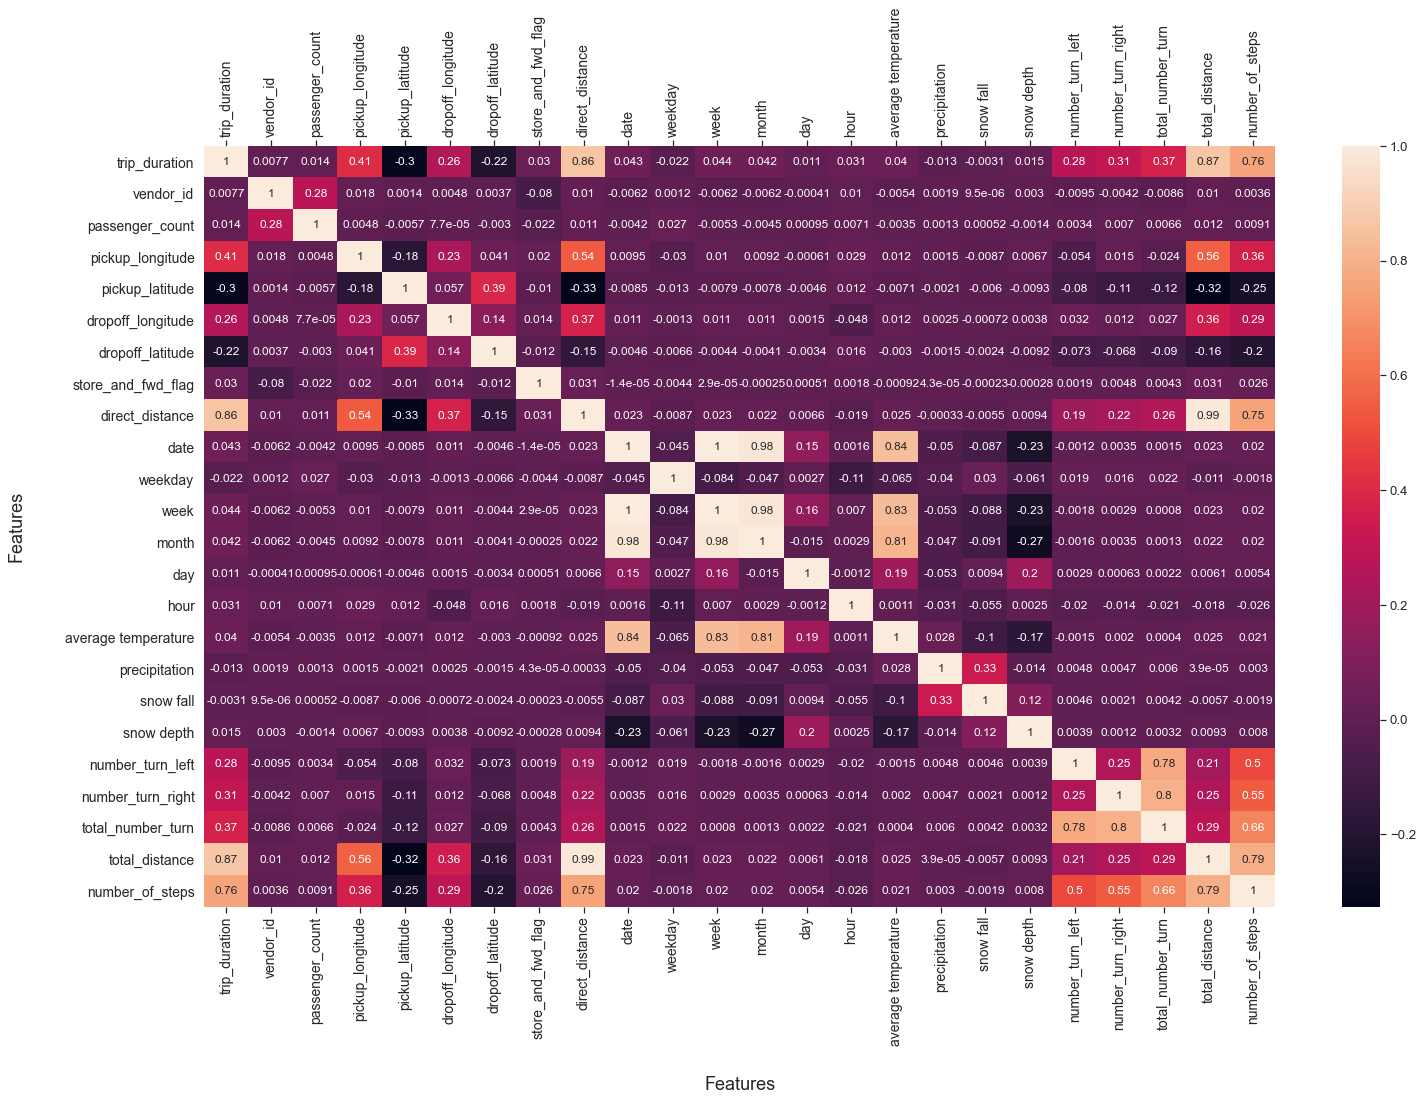

In [56]:
# Vẽ biểu đồ nhiệt tương quan
import seaborn as sns
sns.set(font_scale=1.2, style='darkgrid')
corr = df_train_F3.corr()
plt.figure(figsize=(24,14));
sns.heatmap(corr, annot=True, annot_kws={'fontsize':12}, fmt='.2g');
plt.tick_params(labelsize=14, labelbottom = True, bottom=True, top = True, labeltop=True);
plt.xticks(rotation=90);
plt.xlabel("Features", x=0.5, labelpad=30, size=18);
plt.ylabel("Features", labelpad=40, size=18);


- <span style="color:blue"> Nhận xét:
    - Một vài nhóm biến có tương quan rất cao với nhau (>=0.9) như week, month và date hoặc direction_distance và total_distance
    - Quan sát dòng trên cùng ta thấy biến có tương quan cao nhất với *trip_duration* là total_distance và direction_distance sau đó là number_of_steps, total_number_turn, number_turn_right và number_turn_left, đây là những biến trực tiếp liên quan đến khoảng cách
    

- Ta tiến hành loại bỏ đi một trong những biến có độ tương quan cao (>0.9)

In [57]:
corr = df_train_F3.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(1, corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df_train_F3.columns[columns]
df_train_F3 = df_train_F3[selected_columns]
df_train_F3.head()


,trip_duration,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,direct_distance,date,...,day,hour,average temperature,precipitation,snow fall,snow depth,number_turn_left,number_turn_right,total_number_turn,number_of_steps
0,455,2,1,-73.982155,40.767937,-73.964630,40.765602,0,1502.171837,56,...,14,17,45.5,0.29,0.0,0.0,0,1,1,5
1,663,1,1,-73.980415,40.738564,-73.999481,40.731152,0,1808.659969,136,...,12,0,72.5,0.00,0.0,0.0,2,2,4,6
3,429,2,1,-74.010040,40.719971,-74.012268,40.706718,0,1483.632481,74,...,6,19,39.0,0.00,0.0,0.0,1,1,2,4
5,443,2,6,-73.982857,40.742195,-73.992081,40.749184,0,1099.624910,20,...,30,22,33.5,0.00,0.0,6.0,1,2,3,5
6,341,1,4,-73.969017,40.757839,-73.957405,40.765896,0,1327.328820,141,...,17,22,70.5,0.00,0.0,0.0,1,1,2,5


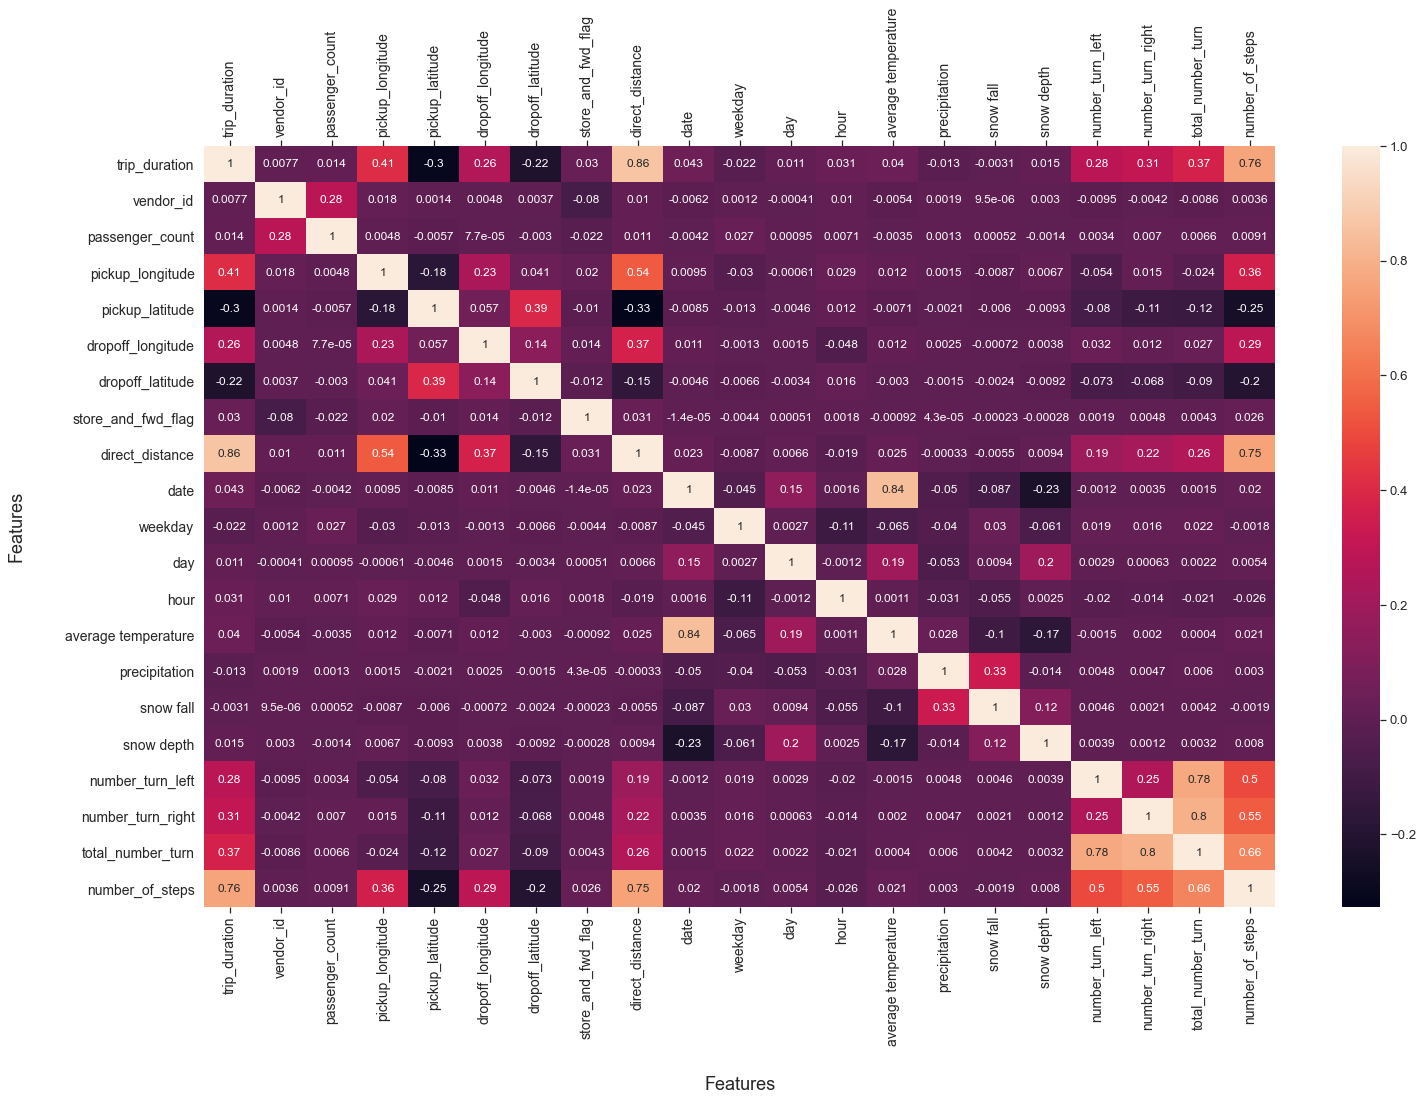

In [58]:
# Vẽ biểu đồ nhiệt tương quan
import seaborn as sns
sns.set(font_scale=1.2, style='darkgrid')
corr = df_train_F3.corr()
plt.figure(figsize=(24,14));
sns.heatmap(corr, annot=True, annot_kws={'fontsize':12}, fmt='.2g');
plt.tick_params(labelsize=14, labelbottom = True, bottom=True, top = True, labeltop=True);
plt.xticks(rotation=90);
plt.xlabel("Features", x=0.5, labelpad=30, size=18);
plt.ylabel("Features", labelpad=40, size=18);


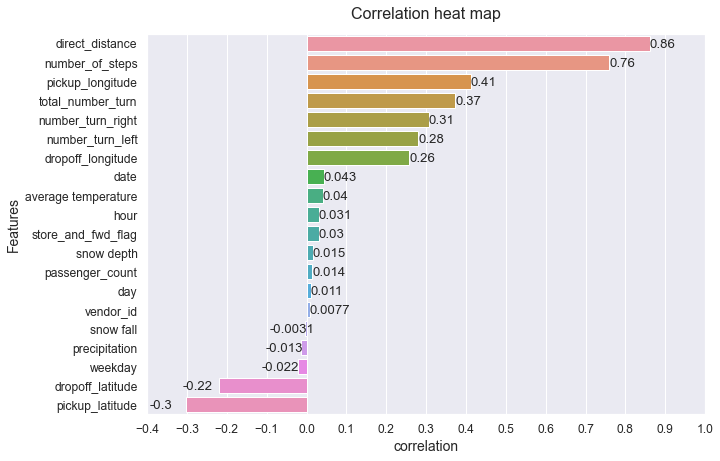

In [59]:
# Sắp xếp độ tương quan với biến trip_duration theo thứ tự giảm dần
sns.set(font_scale=1.1, style='darkgrid')
df_corr = corr.iloc[0, 1:].to_frame()
df_corr.sort_values(by=['trip_duration'], ascending=False, inplace=True)
plt.figure(figsize=(10,7));
ax = sns.barplot(y=df_corr.index, x='trip_duration', data=df_corr, orient='h');
plt.xlabel('correlation', size=14);
plt.ylabel('Features', size=14);
plt.xticks(np.arange(-0.4, 1.1, step=0.1));
plt.title('Correlation heat map', pad=15, size=16)
for p, value in zip(ax.patches, df_corr['trip_duration']):
    if value >=0:
        ax.text(p.get_width(), p.get_y()+0.6, '{0:.2g}'.format(value))
    else:
        ax.text(p.get_width()-0.09, p.get_y()+0.6, '{0:.2g}'.format(value))


#### 4.1.3 Ta chọn các feature theo phương pháp *Backward Elimination*


In [60]:
# Tạo hàm Backward Elimination
import statsmodels.api as sm

def backwardElimination(Y, X, sl, columns):
    numVars = len(X[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, X).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    X = np.delete(X, j, 1)
                    columns = np.delete(columns, j)
        else:
            break
    print(regressor_OLS.summary())
    return X, columns


In [61]:
# Chọn các feature theo phương pháp Backward Elimination
SL = 0.05
X = df_train_F3.drop('trip_duration', axis=1).values
Y = df_train_F3['trip_duration'].values
columns = df_train_F3.drop('trip_duration', axis=1).columns.values
data_modeled, selected_columns = backwardElimination(Y, X, SL, columns)
eliminated_columns = list(set(columns) - set(selected_columns)) 
print('Selected_columns', selected_columns)
print('Eliminated_columns', eliminated_columns)


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          6.675e+05
Date:                Tue, 11 Aug 2020   Prob (F-statistic):                        0.00
Time:                        09:46:45   Log-Likelihood:                     -6.6300e+06
No. Observations:              936022   AIC:                                  1.326e+07
Df Residuals:                  936006   BIC:                                  1.326e+07
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- <span style="color:blue"> Nhận xét:
    - Như vậy theo phương pháp p-values ta chọn được 17 feature, loại đi 3 feature là *pickup_latitude*, *average temperature*, và *vendor_id*

#### 4.2 Using feature importance

- Install lightgbm package 
- Use lightgbm for feature selection


In [62]:
# Install lightgbm
!pip install lightgbm

In [63]:
# Chuẩn bị dữ liệu
from sklearn.model_selection import train_test_split

# Tạo dữ liệu train và dữ liệu test kết quả
df_train_data, df_test_data = train_test_split(df_train_F3, test_size=0.2, random_state=1)

### Test 
columns = ['trip_duration', 'pickup_latitude', 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude',
           'direct_distance', 'number_of_steps',
           'hour', 'weekday', 'date', 'day',
           'average temperature']
#df_train_data.drop(['day'], inplace=True, axis=1)
#df_test_data.drop(['day'], inplace=True, axis=1)
#df_train_data = df_train_data[columns]
#df_test_data = df_test_data[columns]
###

# Tạo dữ liệu train và validate khi training
x = df_train_data.drop(['trip_duration'], axis=1)
y = df_train_data['trip_duration']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [64]:
# import library
import lightgbm as lgbm

# Chuẩn bị dữ liệu cho model
categorical_index = []
categorical_features = ['vendor_id', 'store_and_fwd_flag']
for feature in categorical_features:
    for index, col_name in enumerate(x.columns):
        if feature == col_name:
            categorical_index.append(index)

train_data = lgbm.Dataset(x_train, label=y_train, categorical_feature=categorical_index)
test_data = lgbm.Dataset(x_test, label=y_test)

# Train the model
parameters = {
    'application': 'regression',
    'metric': 'mse',
    'boosting': 'gbdt',
    'n_estimators': 2500,
    'max_depth': 6,
    'num_leaves': 64,
    'learning_rate': 0.05,
    }

evals_result = {}
model = lgbm.train(parameters,
                   train_data,
                   valid_sets=test_data,
                   early_stopping_rounds=1500,
                   evals_result=evals_result,
                   verbose_eval=False
                  );
print('Done')


Done


In [65]:
# Kiểm tra độ chính xác của mô hình
def R_square(y_test, y_predict):
    y_mean = y_test.mean()
    SStot = sum((y_test - y_mean)**2)
    SSres = sum((y_test - y_predict)**2)
    R_square = 1 - SSres/SStot
    return R_square

x_test = df_test_data.drop('trip_duration', axis=1)
y_test = df_test_data['trip_duration']
y_predict = model.predict(x_test)
R_square(y_test, y_predict)


0.9133636806016264

- <span style="color:blue"> Nhận xét:
    - Độ chính xác đạt được của mô hình là hơn 90%

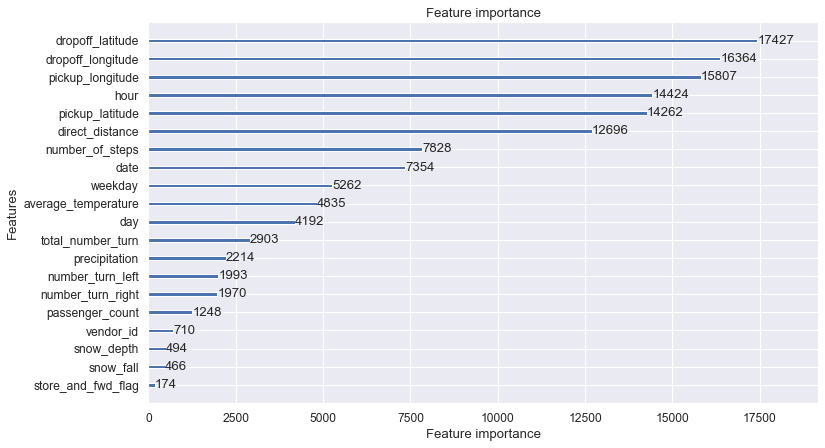

In [66]:
# Vẽ biểu đồ độ quan trọng của các feature  
lgbm.plot_importance(booster=model, figsize=(12,7));


- <span style="color:blue"> Nhận xét:
    - Theo phương pháp __lightgbm__ ta có các feature tốt nhất với độ quan trọng cao thuộc 3 nhóm là: các biến về vị trí (*location*), thời gian trong ngày (*hour*) và khoảng cách trực tiếp (*direct_distance*). 
    - Kết quả được phân nhóm khá rõ ràng. Các biến có liên quan đến nhau thì có độ quan trọng gần nhau
    - Khi thay đổi thông số *max_depth* và *num_leaves* thì độ chính xác có thay đổi ít nhiều, thứ tự độ quan trọng của các feature cũng thay đổi, tuy nhiên với các feature có độ quan trọng cao thuộc 3 nhóm nêu trên thì sự thay đổi là rất ít
    - Kết quả so sánh với phương pháp __Backward Elimination__ ta thấy:
        - Ở các feature có độ tương quan cao thì độ quan trọng cũng cao như: *direct_distance* và *number_of_steps*
        - Phương pháp *Backward Elimination* chỉ áp dụng được với mối quan hệ tuyến tính phát hiện những biến có độ tương quan cao, trong khi phương pháp *lightgbm* có thể phát hiện được biến có độ tương quan thấp nhưng lại có sự tương tác mạnh và rõ ràng với biến phụ thuộc, ví dụ như biến *hour*.
    

### <span style="color:blue">5.Conclusion </span>
- Write all features that you select to predict trip duration on the report